In [2]:
%matplotlib 
# import mpld3
# mpld3.enable_notebook()
import rosbag_pandas
import pandas as pd
import matplotlib.pyplot as plt
import easygui
import rosbag
import json_tricks as json
import numpy as np
import cPickle as pkl
import pickle as pl
import time
import seaborn as sns
from matplotlib.patches import Rectangle, Circle
plt.style.use('ggplot')
# import mpld3
# mpld3.enable_notebook()
def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)
    
def pickler( obj, path):
    """
    Pickle a Python object
    """
    with open(path, "wb") as pfile:
        pkl.dump(obj, pfile)

def depickler( path):
    """
    Extracts a pickled Python object and returns it
    """
    with open(path, "rb") as pfile:
        data = pkl.load(pfile)
    return data
def circles(x, y, s, c='b',ax=None, vmin=None, vmax=None, **kwargs):
    """
    Make a scatter of circles plot of x vs y, where x and y are sequence 
    like objects of the same lengths. The size of circles are in data scale.

    Parameters
    ----------
    x,y : scalar or array_like, shape (n, )
        Input data
    s : scalar or array_like, shape (n, ) 
        Radius of circle in data unit.
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs.
        Note that `c` should not be a single numeric RGB or RGBA sequence 
        because that is indistinguishable from an array of values
        to be colormapped. (If you insist, use `color` instead.)  
        `c` can be a 2-D array in which the rows are RGB or RGBA, however. 
    vmin, vmax : scalar, optional, default: None
        `vmin` and `vmax` are used in conjunction with `norm` to normalize
        luminance data.  If either are `None`, the min and max of the
        color array is used.
    kwargs : `~matplotlib.collections.Collection` properties
        Eg. alpha, edgecolor(ec), facecolor(fc), linewidth(lw), linestyle(ls), 
        norm, cmap, transform, etc.

    Returns
    -------
    paths : `~matplotlib.collections.PathCollection`

    Examples
    --------
    a = np.arange(11)
    circles(a, a, a*0.2, c=a, alpha=0.5, edgecolor='none')
    plt.colorbar()

    License
    --------
    This code is under [The BSD 3-Clause License]
    (http://opensource.org/licenses/BSD-3-Clause)
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle
    from matplotlib.collections import PatchCollection

    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None
    if 'fc' in kwargs: kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs: kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs: kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs: kwargs.setdefault('linewidth', kwargs.pop('lw'))

    patches = [Circle((x_, y_), s_) for x_, y_, s_ in np.broadcast(x, y, s)]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        collection.set_array(np.asarray(c))
        collection.set_clim(vmin, vmax)
    if ax is not None:
        ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    if c is not None:
        plt.sci(collection)
    return collection

Using matplotlib backend: Qt4Agg


In [35]:
import matplotlib as mpl
# df=metadata=None
def quadPlotter(df,metadata,pth='plot.pdf',col=[0,0,0,1],off=20,
                xmin=500,xmax=526,ymin=500,ymax=526,rm=10,s=4,xt='X (m)',yt='Y (m)'):
    
    #get parameters
    parameters=metadata['parameters']
        
    # row and column sharing of fig
    fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(12,12))
    
    #make ax dictionary
    ax={4:ax4,1:ax1,2:ax2,3:ax3}
    
    #loading string
    ls=parameters['loadingString']

    #max speed
    maxS=df.trajectory__speed.max()
    
    
    #plot params
    c1=[1,0,0,0.5]
    c2=[0,1,0,0.5]
    sc=0.7
    non=[0,0,0,0]
    red=[1,0,0,0.3]
    green=[0,1,0,0.3]
    wf=3 #wifth fat
    w0=0 #width thin
    pcol=[1,0.5,0.5,1]#packet color
    #plot marker conditions based on loading string
    if ls=='00':
        l=non
        r=non
        w1=wf
        w2=wf
    elif ls=='01':
        l=non
        r=red
        w1=wf
        w2=w0
    elif ls=='10':
        l=green
        r=non
        w1=w0
        w2=wf
    elif ls=='11':
        l=green
        r=red
        w1=w0
        w2=w0

    ## ax1.set_title('lr anal')
    
#     #make a frame counter which counts up until hitting reset
#     df['trajectory__frame']=df.trajectory__reset*0
#     for i in range(len(df.trajectory__reset)):
#         if i==0:
#             df.trajectory__frame[i]=0
#             continue

#         elif df.trajectory__reset[i]==1:
#             df.trajectory__frame[i]=0
#         elif df.trajectory__reset[i]==0:
#             df.trajectory__frame[i]=df.trajectory__frame[i-1]+1

    #iterate through all the cases of the bag (typically 4 due to quadrants)
    for i in range(int(df.trajectory__case.max()+1)):
        #splice the df for case == i and the fly is still flying
        df2=df[(df.trajectory__case==i) & (df.trajectory__isFlying==True) ]#(df.trajectory__runNum<20) &
        
        #make a frame counter which counts up until hitting reset
#         df2['trajectory__frame']=df2['trajectory__reset'].copy()*0
#         for i in range(len(df2.trajectory__reset)):
#             if i==0:
#                 df2.trajectory__frame[i]=0
#                 continue

#             elif df2.trajectory__reset[i]==1:
#                 df2.trajectory__frame[i]=0
#             elif df2.trajectory__reset[i]==0:
#                 df2.trajectory__frame[i]=df2.trajectory__frame[i-1]+1
        #plot marker scaling
        r1=sc*parameters['obj1Scale']/2
        r2=sc*parameters['obj2Scale']/2
        
        try:
            print df2.trajectory__case[0]
        except IndexError:
            print 'index error in cases at ',i
            continue
        #set the plot markers based on the current case/quadrant
        if df2.trajectory__case[0] == 0:
            c1=l
            c2=l
            l1=w1
            l2=w1
        elif df2.trajectory__case[0]== 1:
            c1=r
            c2=l
            l1=w2
            l2=w1
        elif df2.trajectory__case[0]== 2:
            c1=l
            c2=r
            l1=w1
            l2=w2
        elif df2.trajectory__case[0] == 3:
            c1=r
            c2=r
            l1=w2
            l2=w2
        print 'c1 c2 is',c1,c2
        
#         ax[i+1].add_artist(Circle(xy=(parameters['posL'][0],parameters['posL'][1]), color=c1, radius=r1)) 
#         ax[i+1].add_artist(Circle(xy=(parameters['posR'][0],parameters['posR'][1]), color=c2, radius=r2)) 
#         circles(df2.trajectory__o1Pos_x[0],df2.trajectory__o1Pos_y[0],ax=ax[i+1],color=c1,lw=0,s=parameters['obj1Scale']/2)
#         circles(df2.trajectory__o2Pos_x[0],df2.trajectory__o2Pos_y[0],ax=ax[i+1],color=c2,lw=0,s=parameters['obj1Scale']/2)
            
        
        #if speed closed loop, colorize the trajectory based on the normalized speed, else keep it constant
        if df.trajectory__speedControl[1000]:
            col=df2.trajectory__speed.values/maxS
        else:
            col=col
            
            
        #scatter the trajectory coordinates
        im=ax[i+1].scatter(df2.trajectory__pPos_x[::rm],df2.trajectory__pPos_y[::rm],lw=0,s=s,
                        c=df2.trajectory__runNum,cmap='viridis',rasterized=True)
        
        
        #scatter the points where it recieved odour
        df3=df2[(df2.trajectory__valve1==True) | (df2.trajectory__valve2==True)]
        ax[i+1].scatter(df3.trajectory__pPos_x[::rm],df3.trajectory__pPos_y[::rm],lw=0,s=0.5*s,
                        c=pcol,cmap='viridis',rasterized=True)
        
        
        #plot the initial position with a triangle
        ax[i+1].scatter(parameters['playerInitPos'][0],parameters['playerInitPos'][1],
                        c=np.array([62,218,0,200])/255.,  marker='^',lw=0,s=500)

        
        #plot the position of the lr objects
        ax[i+1].scatter(parameters['posL'][0],parameters['posL'][1],c=c1,lw=l1,s=sc*parameters['obj1Scale'])
        ax[i+1].scatter(parameters['posR'][0],parameters['posR'][1],c=c2,lw=l2,s=sc*parameters[ 'obj2Scale'])
        
        #set the xy lims
        ax[i+1].set_xlim([xmin,xmax])
        ax[i+1].set_ylim([ymin,ymax])

        #make the xy aspect ratio 1:1
        ax[i+1].set_aspect('equal', 'datalim')
        
        #set the title of the plot
        ax[i+1].set_title('pf is '+str(parameters['odourQuad'][i])+'Hz',fontsize=20)
        
        #set the xy labels
        ax[i+1].set_xlabel(xt,fontsize=20)
        ax[i+1].set_ylabel(yt,fontsize=20)
        
        #print the current plot index, pf
        print i,df2.trajectory__packetFrequency[500]
    
#     # Colorbar
#     ax3.cax.colorbar(ax3)
#     ax3.cax.toggle_label(True)
#     fig.colorbar(im, ax=ax3)
    
#     cax,kw = mpl.colorbar.make_axes([ax1,ax2,ax3,ax4])
#     plt.colorbar(im, cax=cax, **kw)
    fig.suptitle(pth, fontsize=16)

    fig.tight_layout()
    fig.subplots_adjust(top=0.88)

#     plt.tight_layout()

#         fig.text(0.5, 0.04, xt, ha='center')
#         fig.text(0.04, 0.5, yt, va='center', rotation='vertical')

#     sns.despine()
#     sns.set_style("ticks")
#         sns.set_style("white")
#         sns.set_style("whitegrid")


#         sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
#     fig.subplots_adjust(right=0.8)
    
    
    
    #if speed control, turn on a color legend
    if df.trajectory__speedControl[0]:

        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
    
    #save the figure
    plt.savefig(pth+'.png', dpi=400)

    plt.show()

##     Save figure handle to disk
#     pl.dump(fig,file(pth+'plot.pickle','wb'))
    return fig

def loader():
    '''Load a dataframe from pickle and analyse lr cases'''

    defaultPath="/media/rhagoletis/6db8b2b2-ebe2-4555-9b79-93b10ef9dec31/2017_03_31/"
    path=easygui.fileopenbox(title="Choose pickle Dataframes"
                              ,default=defaultPath,
                              multiple=False,filetypes=["*.pickle"])
    print path

    dff=pd.read_pickle(path)
    df=dff['df']
    metadata=dff['metadata']
    return df,metadata,path


2017-04-17__23~05~43_apple34_00_odour_gain~8_speed~1.0_bout~30_DC~-0.128_traj.pdf
0.0
c1 c2 is [0, 0, 0, 0] [0, 0, 0, 0]
0 1.0
1.0
c1 c2 is [0, 0, 0, 0] [0, 0, 0, 0]
1 1.0
2.0
c1 c2 is [0, 0, 0, 0] [0, 0, 0, 0]
2 8.0
3.0
c1 c2 is [0, 0, 0, 0] [0, 0, 0, 0]
3 16.0


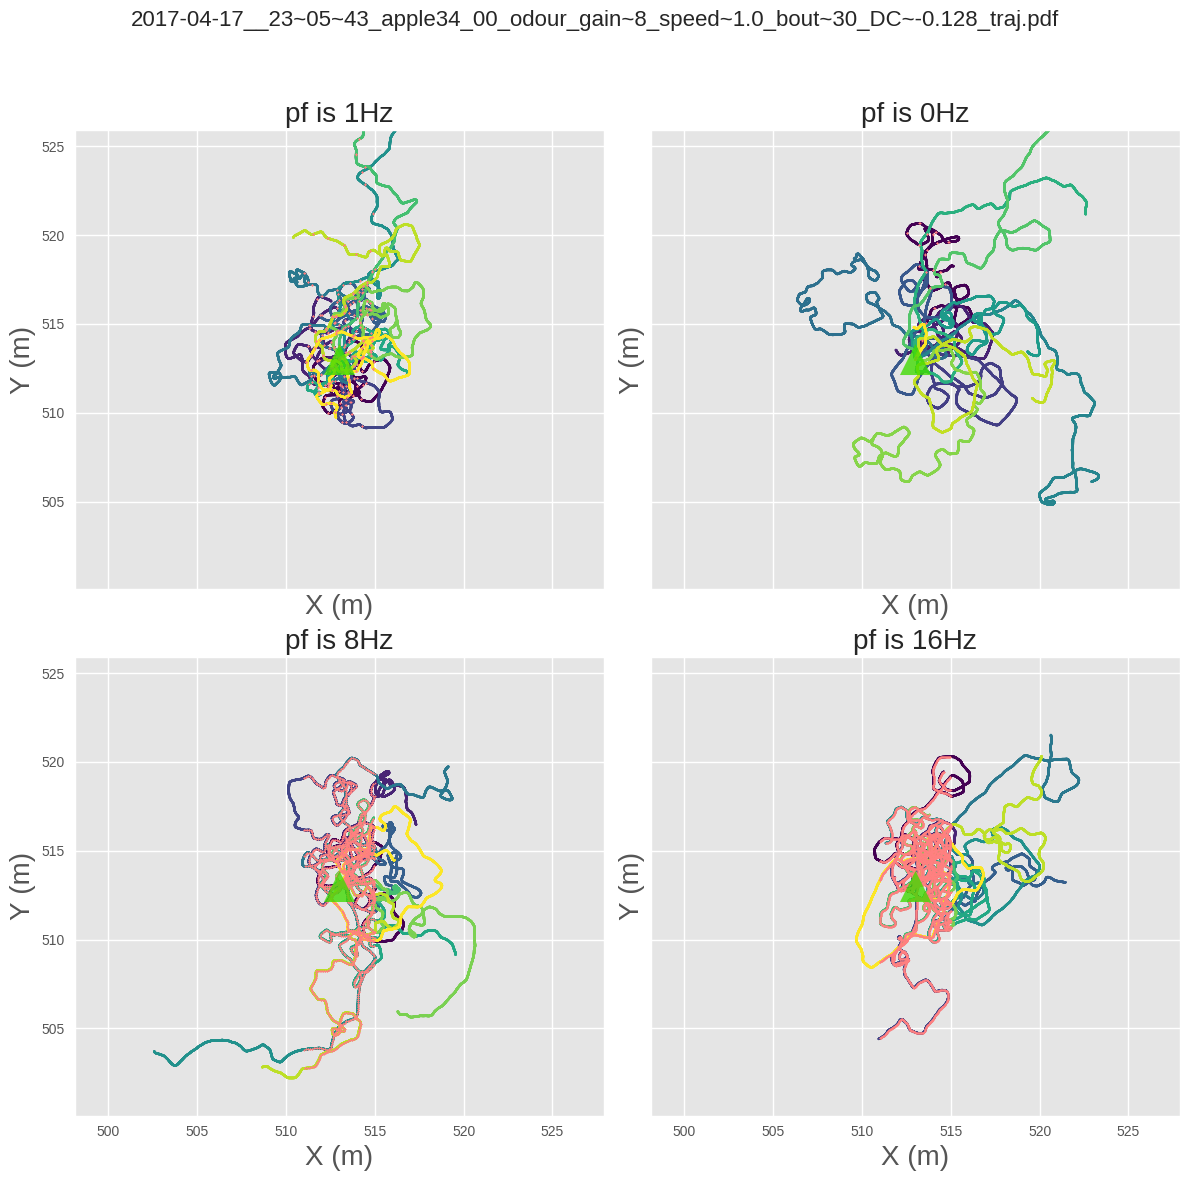

In [37]:
# df,metadata,path=loader()
parameters=metadata['parameters']
pth=path.split('/')[-1].split('.bag')[0]+'.pdf'
print pth


quadPlotter(df=df,metadata=metadata,off=3,rm=1,xt='X (m)',yt='Y (m)',s=3,pth=pth,col=[0,0,0,1])

In [10]:
parameters

{u'DCoffset': 0.138,
 u'DCoffsetIncrement': 0.002,
 u'area': 8,
 u'areaMode': True,
 u'bagFileName': u'bags/2017_03_12/2017-03-12__20:51:25_apple24_11_gain:8_speed:1.0_bout:20_DC:0.138_full',
 u'bagFullTopics': u'/rhag_camera/image_raw/compressed /kinefly/image_output /servo_camera/image_raw/compressed /kinefly/flystate /trajectory  ',
 u'bagTrajTopics': u'/kinefly/flystate /trajectory ',
 u'bboxDist': 1.0,
 u'beepPath': u'/home/rhagoletis/catkin/src/World/models/sounds/beep.wav',
 u'boutNum': 1,
 u'camFOV': [120, 140],
 u'camHpr': [0, 0, 0],
 u'captureScale': 1.0,
 u'captureStart': 0,
 u'durList': [3, 3, 3, 3, 3, 3],
 u'durListGen': False,
 u'emergence': u'2017-02-03',
 u'factorDur': 0.65,
 u'fly': u'apple24',
 u'fps': 165,
 u'frameNum': 0,
 u'frameRecord': False,
 u'frameRecordPath': u'/home/rhagoletis/catkin/src/World/frames/test/test1',
 u'gain': 8,
 u'gainIncrement': 0.02,
 u'generateWorld': True,
 u'gpMode': True,
 u'greenTexPath': u'/home/transire/catkin/src/world/models/green.t

In [9]:
'''Load a dataframe from pickle and analyse lr cases'''

defaultPath="/home/rhagoletis/catkin/src/World/bags/"
paths=easygui.fileopenbox(title="Choose pickle Dataframes"
                          ,default=defaultPath,
                          multiple=True,filetypes=["*.pickle"])
print paths
for path in paths:
#     plt.close('all')

    dff=pd.read_pickle(path)
    df=dff['df']
    metadata=dff['metadata']

    # df,metadata,path=loader()
    parameters=metadata['parameters']
    pth=path.split('/')[-1].split('.bag')[0]+'.pdf'
    print pth

    quadPlotter(df=df,metadata=metadata,off=3,rm=1,xt='X (m)',yt='Y (m)',s=3,pth=pth,col=[0,0,0,1])

['/home/rhagoletis/catkin/src/World/bags/10-3/dfpick/2017-03-30__21:53:22_apple28_00_odour_gain:8_speed:1.0_bout:15_DC:-0.112_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/bags/10-3/dfpick/2017-03-30__22:10:17_apple28_00_odour_gain:8_speed:1.0_bout:15_DC:-0.112_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/bags/10-3/dfpick/2017-03-30__22:32:35_apple28_00_odour_gain:8_speed:1.0_bout:15_DC:-0.356_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/bags/10-3/dfpick/2017-03-30__22:51:51_apple28_00_odour_gain:8_speed:1.0_bout:15_DC:-0.356_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/bags/10-3/dfpick/2017-03-30__23:18:45_apple28_00_odour_gain:8_speed:1.0_bout:15_DC:-0.278_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/bags/10-3/dfpick/2017-04-04__22:35:24_apple29_00_odour_gain:8_speed:1.0_bout:15_DC:0.018_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/bags/10-3/dfpick/2017-04-04__23:32:41_apple29_00_odour_gain:8_speed:1.0_bout:15_DC:0.018_

In [ ]:
plt.scatter(df[(df.trajectory__case==0) & (df.trajectory__isFlying==True)].index,df[(df.trajectory__case==0) & (df.trajectory__isFlying==True)].trajectory__packetFrequency)
plt.show()

In [7]:
import matplotlib.pyplot as plt
import pickle as pl
import numpy as np

# Load figure from disk and display
p='/home/rhagoletis/catkin/src/World/ipy_notebooks/2017-02-01__22:00:20_apple16_00_odour_gain:8_speed:1.0_bout:30_DC:-0.192_traj.pdfplot.pickle'
fig_handle = pl.load(open(p,'rb'))
# fig_handle.show()

Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/backends/backend_qt5agg.py", line 197, in __draw_idle_agg
    FigureCanvasAgg.draw(self)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/backends/backend_agg.py", line 464, in draw
    self.figure.draw(self.renderer)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py", line 63, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py", line 1143, in draw
    renderer, self, dsu, self.suppressComposite)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/image.py", line 139, in _draw_list_compositing_images
    a.draw(renderer)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py", line 63, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py", line 2347, in draw
    self.apply_aspect()
  File "/usr/l

In [ ]:
df['trajectory__frame']=df.trajectory__reset*0

df2=df.copy()#[(df.trajectory__isFlying==True) ]#(df.trajectory__runNum<20) &
# df2.trajectory__frame.plot()
# plt.show()
df.trajectory__frame.plot()
df2.trajectory__frame.plot()


# plt.show()

In [ ]:
df2=df.copy()#[(df.trajectory__isFlying==True) ]#(df.trajectory__runNum<20) &

df2.trajectory__frame

In [ ]:
df.trajectory__frame=df.trajectory__reset*0
for i in range(len(df.trajectory__reset)):
    if i==0:
        df.trajectory__frame[i]=0
        continue

    elif df.trajectory__reset[i]==1:
        df.trajectory__frame[i]=0
    elif df.trajectory__reset[i]==0:
        df.trajectory__frame[i]=df.trajectory__frame[i-1]+1


In [ ]:
df.trajectory__frame=df.trajectory__reset

In [ ]:
df.trajectory__frame[0]

In [ ]:
import matplotlib as mpl
# df=metadata=None
def quadDistPlotter(pth='plot.pdf',col=[0,0,0,1],off=20,
                xmin=506,xmax=520,ymin=508,ymax=522,rm=10,s=4,xt='X (m)',yt='Y (m)'):
    
        # row and column sharing
    fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(14,14))
    ax={4:ax4,1:ax1,2:ax2,3:ax3}
#     maxS=df.trajectory__speed.max()
    # ax1.set_title('lr anal')
    dfD,metadataD,paths=multLoader()
    for i in range(int(4)):
#         df,metadata,path=loader()
        df=dfD[i]
        metadata=metadataD[i]
        parameters=metadata['parameters']
        df2=df[(df.trajectory__case==2) &(df.trajectory__isFlying==True)]
        c1=[1,0,0,0.5]
        c2=[0,1,0,0.5]

#         circles(df2.trajectory__o1Pos_x[0],df2.trajectory__o1Pos_y[0],ax=ax[i+1],color=c1,lw=0,s=parameters['obj1Scale']/2)
#         circles(df2.trajectory__o2Pos_x[0],df2.trajectory__o2Pos_y[0],ax=ax[i+1],color=c2,lw=0,s=parameters['obj1Scale']/2)
        sc=0.7
        r1=sc*parameters['obj1Scale']/2
        r2=sc*parameters['obj2Scale']/2
        
        ls=parameters['loadingString']
        non=[0,0,0,0]
        red=[1,0,0,0.3]
        green=[0,1,0,0.3]
        wf=3 #wifth fat
        w0=0 #width thin
        
        if ls=='00':
            l=non
            r=non
            w1=wf
            w2=wf
        elif ls=='01':
            l=non
            r=red
            w1=wf
            w2=w0
        elif ls=='10':
            l=green
            r=non
            w1=w0
            w2=wf
        elif ls=='11':
            l=green
            r=red
            w1=w0
            w2=w0

        if df2.trajectory__case[0] == 0:
            c1=l
            c2=l
            l1=w1
            l2=w1
        elif df2.trajectory__case[0]== 1:
            c1=r
            c2=l
            l1=w2
            l2=w1
        elif df2.trajectory__case[0]== 2:
            c1=l
            c2=r
            l1=w1
            l2=w2
        elif df2.trajectory__case[0] == 3:
            c1=r
            c2=r
            l1=w2
            l2=w2
        print 'c1 c2 is',c1,c2
        
#         ax[i+1].add_artist(Circle(xy=(parameters['posL'][0],parameters['posL'][1]), color=c1, radius=r1)) 

#         ax[i+1].add_artist(Circle(xy=(parameters['posR'][0],parameters['posR'][1]), color=c2, radius=r2)) 
            
        
        if df.trajectory__speedControl[0]:
            col=df2.trajectory__speed.values/maxS
        else:
            col=col
            
        im=ax[i+1].scatter(df2.trajectory__pPos_x[::rm],df2.trajectory__pPos_y[::rm],lw=0,s=s
                        ,c=col,cmap='viridis',rasterized=True)
        
        parameters['playerInitPos']=(df2.trajectory__pPos_x[0],df2.trajectory__pPos_y[0])
        print "init pos",parameters['playerInitPos'][0]
        ax[i+1].scatter(parameters['playerInitPos'][0],parameters['playerInitPos'][1],c=np.array([62,218,0,200])/255.,
                        marker='^',lw=0,s=500)

        ax[i+1].scatter(parameters['posL'][0],parameters['posL'][1],c=c1,lw=l1,s=sc*parameters['obj1Scale'])
        ax[i+1].scatter(parameters['posR'][0],parameters['posR'][1],c=c2,lw=l2,s=sc*parameters[ 'obj2Scale'])

        ax[i+1].set_xlim([xmin,xmax])
        ax[i+1].set_ylim([ymin,ymax])

        ax[i+1].set_aspect('equal', 'datalim')
#         ax[i+1].set_title(i)
        
        ax[i+1].set_xlabel(xt)
        ax[i+1].set_ylabel(yt)

        print i
    
#     # Colorbar
#     ax3.cax.colorbar(ax3)
#     ax3.cax.toggle_label(True)
#     fig.colorbar(im, ax=ax3)
    
#     cax,kw = mpl.colorbar.make_axes([ax1,ax2,ax3,ax4])
#     plt.colorbar(im, cax=cax, **kw)
        plt.tight_layout()
#         fig.text(0.5, 0.04, xt, ha='center')
#         fig.text(0.04, 0.5, yt, va='center', rotation='vertical')

#     sns.despine()
#     sns.set_style("ticks")
#         sns.set_style("white")
#         sns.set_style("whitegrid")


#         sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
#     fig.subplots_adjust(right=0.8)
    
    if df.trajectory__speedControl[0]:

        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
    
    plt.savefig(pth, dpi=400)

    plt.show()
    return fig

def multLoader():
    '''Load a dataframe from pickle and analyse lr cases'''

    defaultPath="/home/rhagoletis/catkin/src/World/bags/"
#     paths=easygui.fileopenbox(title="Choose pickle Dataframes"
#                               ,default=defaultPath,
#                               multiple=True,filetypes=["*.pickle"])
    paths=['/home/rhagoletis/catkin/src/World/bags/2017_01_02/2017-01-02__15:54:36_apple11_01_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/bags/2017_01_02/2017-01-02__17:01:04_apple11_01_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/bags/2017_01_02/2017-01-02__17:18:07_apple11_01_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/bags/2017_01_02/2017-01-02__18:07:00_apple11_01_traj.bag_df.pickle']
    print paths
    
    df={}
    metadata={}
    
    i=0
    for path in paths:
        dff=pd.read_pickle(path)
        df[i]=dff['df']
        metadata[i]=dff['metadata']
        i+=1
    return df,metadata,paths


In [ ]:
# df,metadata,path=loader()
# parameters=metadata['parameters']
# pth=path.split('/')[-1].split('.bag')[0]+'.pdf'
quadDistPlotter(off=3,rm=2,xt='X (m)',yt='Y (m)',s=3,col=[0,0,0,1],ymin=490,ymax=520,xmin=498,xmax=528)

In [ ]:
plt.show()

In [ ]:
np.array([1,2,3])/2.

In [ ]:
df.trajectory__case.plot()
plt.show()

In [ ]:
import matplotlib.pyplot as plt, mpld3
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
mpld3.show()

In [ ]:
# row and column sharing
f, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(16,16))
ax={4:ax4,1:ax1,2:ax2,3:ax3}
# ax1.set_title('lr anal')
for i in range(int(df.trajectory__case.max()+1)):
    df2=df[(df.trajectory__case==i) & (df.trajectory__runNum<20) &(df.trajectory__isFlying==True)]
    ax[i+1].scatter(df2.trajectory__pPos_x,df2.trajectory__pPos_y,lw=0,alpha=1,s=0.2,c=(df2.trajectory__speed,df2.trajectory__speed,1))
    ax[i+1].set_aspect('equal', 'datalim')
    ax[i+1].set_title(i)
    print i
plt.tight_layout()
plt.show()



In [ ]:
'''Load a dataframe from pickle and analyse lr cases'''

defaultPath="/home/rhagoletis/catkin/src/World/bags/"
path=easygui.fileopenbox(title="Choose pickle Dataframes"
                          ,default=defaultPath,
                          multiple=False,filetypes=["*.pickle"])
print path

dff=pd.read_pickle(path)
df=dff['df']
dff

In [ ]:
print df2.trajectory__o1Pos_x[0],df2.trajectory__o1Pos_y[0]
print df2.trajectory__o2Pos_x[0],df2.trajectory__o2Pos_y[0]

In [ ]:
df2.trajectory__o1Pos_x.plot()
df2.trajectory__o2Pos_x.plot()
df2.trajectory__o1Pos_y.plot()
df2.trajectory__o2Pos_y.plot()
plt.show()

In [ ]:
df2=df[df.trajectory__case==3]
# df2

In [ ]:
plt.scatter(df2.trajectory__pPos_x,df2.trajectory__pPos_y,lw=0)
plt.show()

In [ ]:
range(3)

In [ ]:
df.trajectory__case.max()

In [ ]:
jsonPath=paths[0].split('.bag')[0]+'.json'
jsonPath

In [ ]:
with open(jsonPath,'r') as js:
    a= js.read()

In [ ]:
json.loads(a)